In [1]:
import copy

import qgrid

import numpy as np
import matplotlib.pyplot as plt

from pymatgen import Structure
from SubmitJob import SubmitJob
from dftman_utils import *

PSEUDO_TABLE = '/data/tools/shared/dftman/pseudo_table.json'
PSEUDO_FAMILY = 'GBRV_US_PBE'

qgrid.enable()
MP_API_KEY = '0WqdPfXxloze6T9N'
db = init_db()

This database already exists! Loading instead.


In [2]:
criteria = {
    'elements': 'Al',
    'nsites': 1,
    'spacegroup.number': 225,
}
properties = ['spacegroup.number']
m = mpquery_helper(criteria, properties, MP_API_KEY)
m.query()
m.display()

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defaultColumnWidth': 150, 'rowHeight': 28, 'enableColumnReorder': False, 'enableTextSelectionOnCells': True, 'editable': True, 'autoEdit': False, 'explicitInitialization': True, 'maxVisibleRows': 15, 'minVisibleRows': 8, 'sortable': True, 'filterable': True, 'highlightSelectedCell': False, 'highlightSelectedRow': True}, id='78e1c3dc-1e27-4959-8618-c462e470da8c', precision=5)

In [3]:
prim_fcc_structure = Structure.from_dict(
    m.df[m.df['spacegroup.number']==225]['structure'].tolist()[0])
conv_a = prim_fcc_structure.lattice.a * np.sqrt(2)
conv_fcc_structure = Structure(lattice=np.eye(3)*conv_a,
                               species=['Al']*4,
                               coords=[[0.0, 0.0, 0.0],
                                       [0.5, 0.5, 0.0],
                                       [0.5, 0.0, 0.5],
                                       [0.0, 0.5, 0.5]])

final_strain = (1 / np.sqrt(2)) - 1
strained_structures = {}
for strain in np.linspace(final_strain, 0, 20):
    strained_structure = copy.deepcopy(conv_fcc_structure)
    strained_structure.apply_strain([0, 0, strain])
    strained_structures[strain] = strained_structure
    
KPRA = 18 / conv_fcc_structure.lattice.reciprocal_lattice.a

PSEUDO = pseudo_helper(conv_fcc_structure, PSEUDO_FAMILY,
                       PSEUDO_TABLE)
base_inputs = {
    'structure': None,

    'control': {
        'calculation': 'relax',
        'verbosity': 'high',
        'disk_io': 'none',
    },
    'system': {
        'ibrav': 0,
        'ecutwfc': 25.0,
        'occupations': 'smearing',
        'degauss': 0.01,
        'smearing': 'mv',
    },
    'electrons': {
        'electron_maxstep': 500,
        'conv_thr': 1.0e-7,
    },
    'ions': {},
    'cell': {},
    'kpoints_mode': 'automatic',
    'kpoints_grid': (None, None, None),
    'kpoints_shift': (0, 0, 0),

    'pseudo': PSEUDO
}

# structure_keys = []
# for strain, strained_structure in strained_structures.items():
#     inputs = copy.deepcopy(base_inputs)
#     inputs['structure'] = strained_structure
#     k_c = int(KPRA*strained_structure.lattice.reciprocal_lattice.c)
#     inputs['kpoints_grid'] = (18, 18, k_c)
    
#     runname = 'AlFccRelaxSEP{}'.format(str(strain).replace('.', 'DOT').replace('-', 'NEG'))
#     calculation = pwcalculation_helper(**inputs,
#                                        additional_inputs=list(PSEUDO.values()))
#     job = SubmitJob(calculation, 'espresso-6.2.1_pw', runname=runname)
#     key = db_store(job, db)
#     structure_keys.append(key)
#     job.submit()
    
# print(structure_keys)

Added e0a471 to the database
Submitted job AlfccSEPNEG0DOT29289321881345254 e0a471
Added 850362 to the database
Submitted job AlfccSEPNEG0DOT27747778624432345 850362
Added 349386 to the database
Submitted job AlfccSEPNEG0DOT26206235367519437 349386
Added fb78b2 to the database
Submitted job AlfccSEPNEG0DOT2466469211060653 fb78b2
Added 21ad8b to the database
Submitted job AlfccSEPNEG0DOT2312314885369362 21ad8b
Added a20559 to the database
Submitted job AlfccSEPNEG0DOT21581605596780712 a20559
Added 7b6e97 to the database
Submitted job AlfccSEPNEG0DOT20040062339867806 7b6e97
Added 0a65e1 to the database
Submitted job AlfccSEPNEG0DOT18498519082954898 0a65e1
Added 198e4b to the database
Submitted job AlfccSEPNEG0DOT1695697582604199 198e4b
Added 2430eb to the database
Submitted job AlfccSEPNEG0DOT1541543256912908 2430eb
Added 7e394a to the database
Submitted job AlfccSEPNEG0DOT13873889312216173 7e394a
Added 2baf78 to the database
Submitted job AlfccSEPNEG0DOT12332346055303264 2baf78
Added 72

In [ ]:
structure_keys = ['e0a471', '850362', '349386', 'fb78b2', '21ad8b', 'a20559',
                  '7b6e97', '0a65e1', '198e4b', '2430eb', '7e394a', '2baf78',
                  '723f86', 'ebfeeb', 'e8c192', '2b77c3', '45ac8d', '5b81ed',
                  '2bf240', 'e7f502']

In [47]:
job_statuses([db.SubmitJobs[key] for key in structure_keys
              if db.SubmitJobs[key].status != 'Complete'])

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defaultColumnWidth': 150, 'rowHeight': 28, 'enableColumnReorder': False, 'enableTextSelectionOnCells': True, 'editable': True, 'autoEdit': False, 'explicitInitialization': True, 'maxVisibleRows': 15, 'minVisibleRows': 8, 'sortable': True, 'filterable': True, 'highlightSelectedCell': False, 'highlightSelectedRow': True}, id='099ce02c-2dac-453d-9835-36e87a66e521', precision=5)

In [48]:
submit_status()

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defaultColumnWidth': 150, 'rowHeight': 28, 'enableColumnReorder': False, 'enableTextSelectionOnCells': True, 'editable': True, 'autoEdit': False, 'explicitInitialization': True, 'maxVisibleRows': 15, 'minVisibleRows': 8, 'sortable': True, 'filterable': True, 'highlightSelectedCell': False, 'highlightSelectedRow': True}, id='ce16c575-53cf-4485-9e78-fb4715e03630', precision=5)

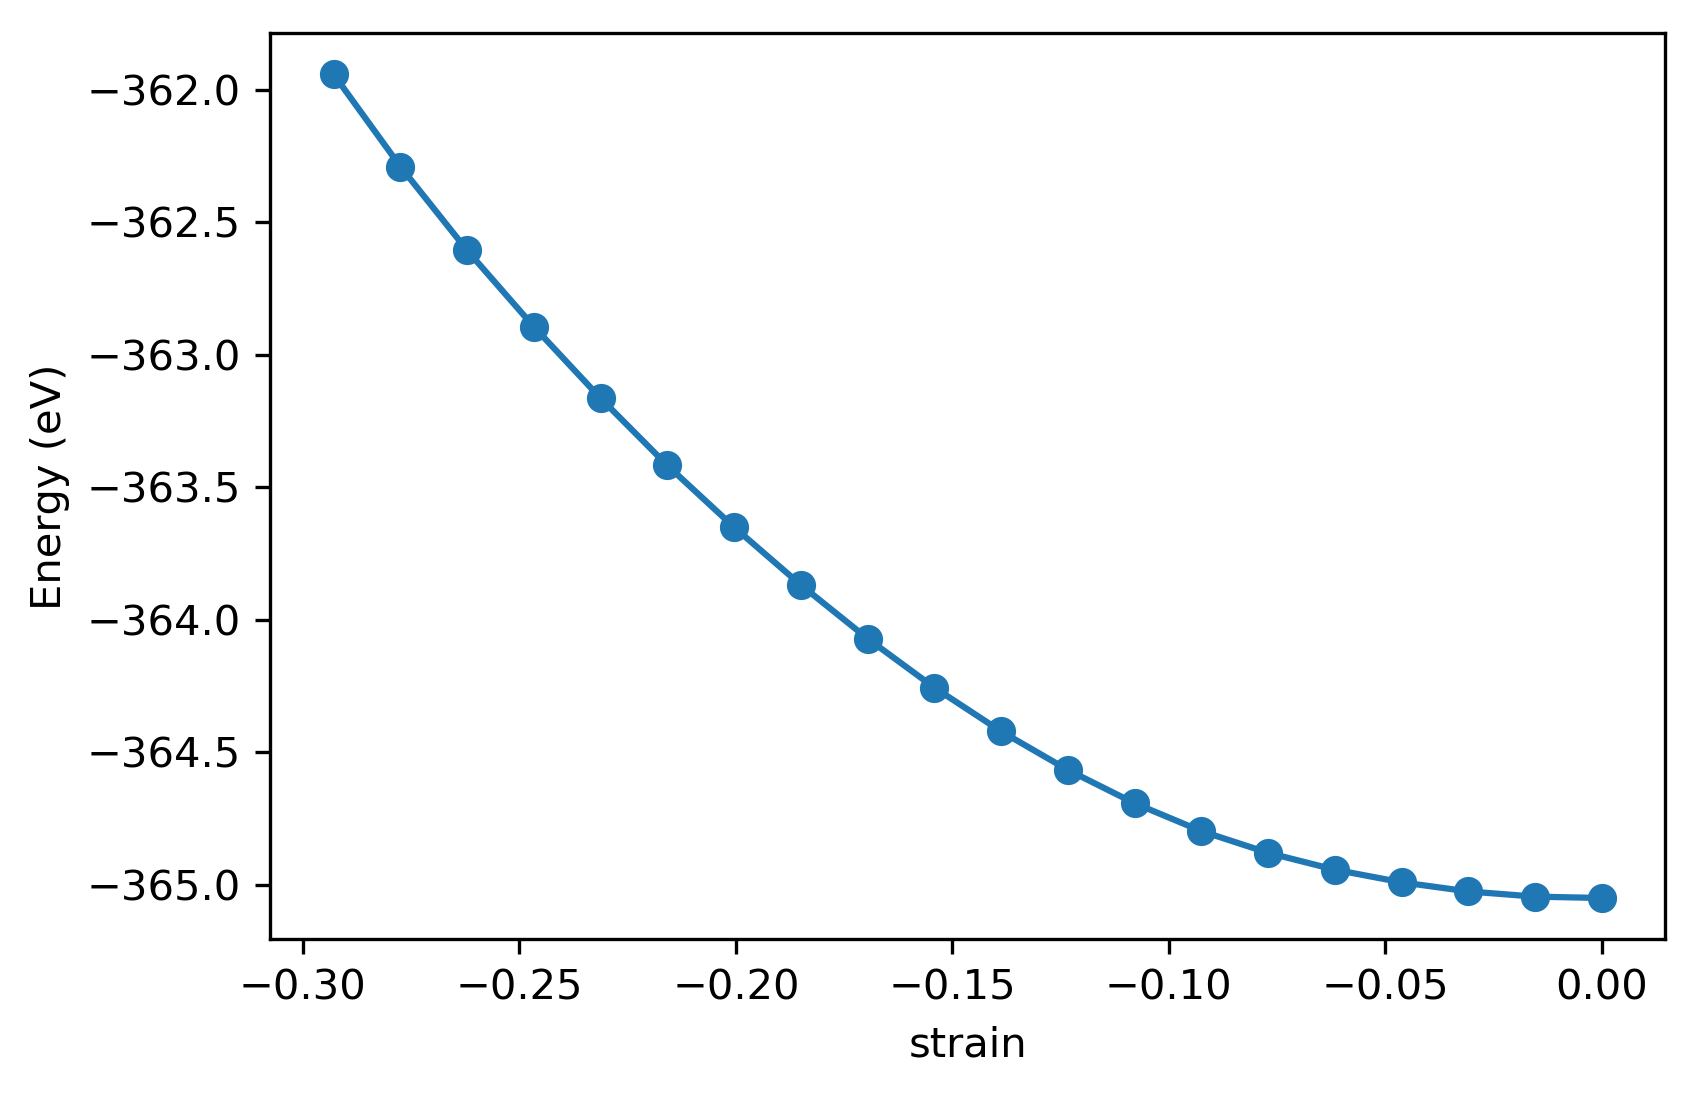

In [49]:
complete_jobs = []
for key in structure_keys:
    job = db.SubmitJobs[key]
    if job.status == 'Complete':
        job.parse_output()
        complete_jobs.append(job)

strains = []
for job in complete_jobs:
    runname = copy.copy(job.runname)
    parsed_runname = runname.replace('SEP', '_')\
                            .replace('NEG', '-')\
                            .replace('DOT', '.')
    strain = float(parsed_runname.split('_')[-1])
    strains.append(strain)

c_by_as = []
for job in complete_jobs:
    c = job.calculation.input.structure.lattice.c
    a = job.calculation.input.structure.lattice.a
    c_by_as.append(c/a)
        
data = {
    'energies': [job.output.final_total_energy\
                 for job in complete_jobs],
    'strains': strains,
    'c_by_as': c_by_as,
    'volumes': [job.calculation.input.structure.volume
                for job in complete_jobs]
}
df = pd.DataFrame(data)
df.sort_values(by='strains')

fig = plt.figure()
fig.set_dpi(300)
ax = plt.gca()
plt.plot(df['strains'], df['energies'], marker='o')
plt.xlabel('strain')
plt.ylabel('Energy (eV)')
plt.show()
plt.close()

In [42]:
df[df.strains == 0].energies.tolist()[0]/4 - df[df.strains == df.strains.min()].energies.tolist()[0]/4

-0.7771431315008925

In [32]:
df

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defaultColumnWidth': 150, 'rowHeight': 28, 'enableColumnReorder': False, 'enableTextSelectionOnCells': True, 'editable': True, 'autoEdit': False, 'explicitInitialization': True, 'maxVisibleRows': 15, 'minVisibleRows': 8, 'sortable': True, 'filterable': True, 'highlightSelectedCell': False, 'highlightSelectedRow': True}, id='4d936b51-a5aa-4830-b428-5cd3937f240b', precision=5)